<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 10s 17ms/step - loss: 0.6528 - accuracy: 0.5586 - val_loss: 0.2984 - val_accuracy: 0.8709
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2372 - accuracy: 0.9056 - val_loss: 0.2934 - val_accuracy: 0.8788
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1577 - accuracy: 0.9408 - val_loss: 0.3166 - val_accuracy: 0.8753
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1132 - accuracy: 0.9635 - val_loss: 0.3476 - val_accuracy: 0.8768
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0699 - accuracy: 0.9803 - val_loss: 0.4099 - val_accuracy: 0.8704
Epoch 6/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0324 - accuracy: 0.9946 - val_loss: 0.4592 - val_accuracy: 0.8731
Epoch 7/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0126 - accuracy: 0.9989 - val_loss: 0.52

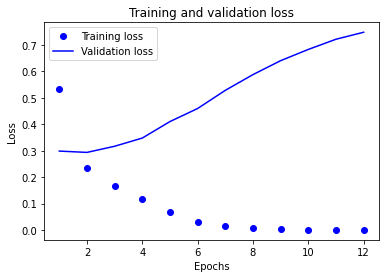

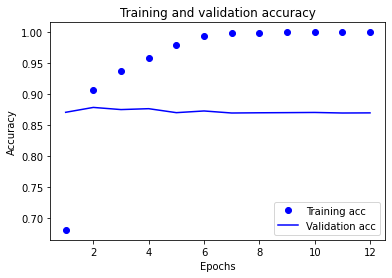

              precision    recall  f1-score   support

           0      0.847     0.925     0.884     12500
           1      0.917     0.833     0.873     12500

    accuracy                          0.879     25000
   macro avg      0.882     0.879     0.879     25000
weighted avg      0.882     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6031 - accuracy: 0.6236 - val_loss: 0.2965 - val_accuracy: 0.8758
Epoch 2/100
176/176 [==============================] - 3s 14ms/step - loss: 0.2123 - accuracy: 0.9200 - val_loss: 0.2758 - val_accuracy: 0.8857
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1497 - accuracy: 0.9464 - val_loss: 0.3029 - val_accuracy: 0.8807
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0929 - accuracy: 0.9690 - val_loss: 0.3540 - val_accuracy: 0.8736
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

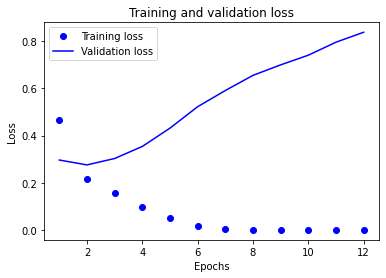

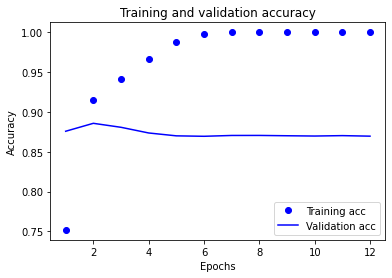

              precision    recall  f1-score   support

           0      0.900     0.868     0.884     12500
           1      0.873     0.903     0.888     12500

    accuracy                          0.886     25000
   macro avg      0.886     0.886     0.886     25000
weighted avg      0.886     0.886     0.886     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6073 - accuracy: 0.6204 - val_loss: 0.3128 - val_accuracy: 0.8689
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2211 - accuracy: 0.9128 - val_loss: 0.2783 - val_accuracy: 0.8842
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1513 - accuracy: 0.9477 - val_loss: 0.2973 - val_accuracy: 0.8823
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0948 - accuracy: 0.9727 - val_loss: 0.3413 - val_accuracy: 0.8761
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

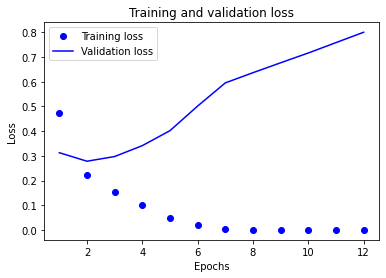

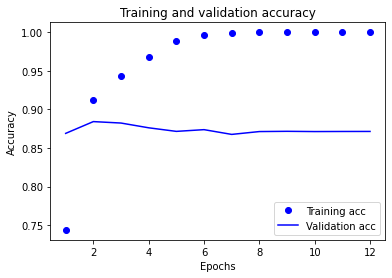

              precision    recall  f1-score   support

           0      0.863     0.913     0.887     12500
           1      0.908     0.855     0.881     12500

    accuracy                          0.884     25000
   macro avg      0.885     0.884     0.884     25000
weighted avg      0.885     0.884     0.884     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6056 - accuracy: 0.6216 - val_loss: 0.2817 - val_accuracy: 0.8806
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2095 - accuracy: 0.9199 - val_loss: 0.3073 - val_accuracy: 0.8735
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1382 - accuracy: 0.9529 - val_loss: 0.3288 - val_accuracy: 0.8762
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0674 - accuracy: 0.9821 - val_loss: 0.3802 - val_accuracy: 0.8745
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

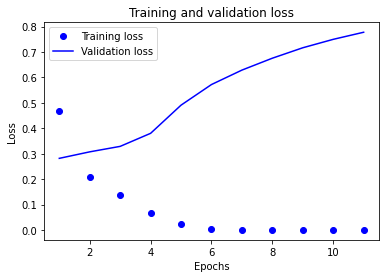

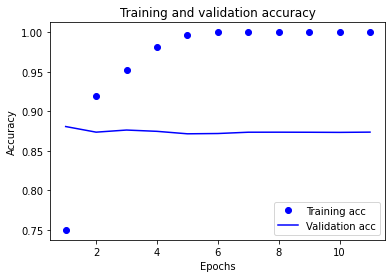

              precision    recall  f1-score   support

           0      0.864     0.904     0.883     12500
           1      0.899     0.857     0.878     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.5915 - accuracy: 0.6355 - val_loss: 0.2852 - val_accuracy: 0.8811
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2078 - accuracy: 0.9219 - val_loss: 0.3044 - val_accuracy: 0.8741
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1381 - accuracy: 0.9538 - val_loss: 0.3054 - val_accuracy: 0.8777
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0792 - accuracy: 0.9786 - val_loss: 0.3724 - val_accuracy: 0.8712
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

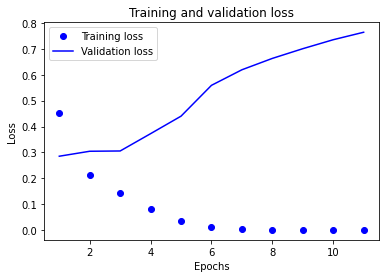

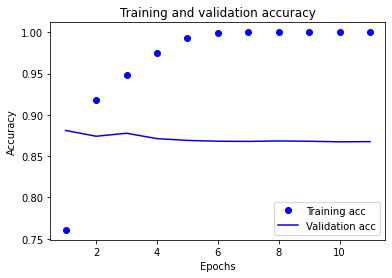

              precision    recall  f1-score   support

           0      0.913     0.843     0.876     12500
           1      0.854     0.920     0.886     12500

    accuracy                          0.881     25000
   macro avg      0.883     0.881     0.881     25000
weighted avg      0.883     0.881     0.881     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 4s 16ms/step - loss: 0.6554 - accuracy: 0.5708 - val_loss: 0.3027 - val_accuracy: 0.8714
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2330 - accuracy: 0.9082 - val_loss: 0.2659 - val_accuracy: 0.8891
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1591 - accuracy: 0.9436 - val_loss: 0.2889 - val_accuracy: 0.8833
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1109 - accuracy: 0.9645 - val_loss: 0.3342 - val_accuracy: 0.8770
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

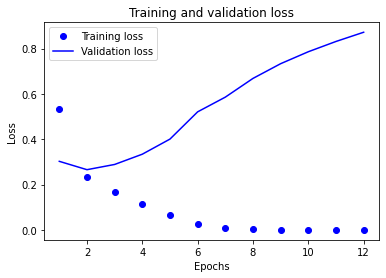

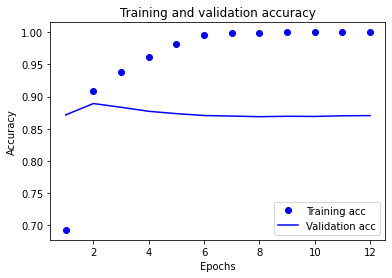

              precision    recall  f1-score   support

           0      0.890     0.887     0.889     12500
           1      0.888     0.891     0.889     12500

    accuracy                          0.889     25000
   macro avg      0.889     0.889     0.889     25000
weighted avg      0.889     0.889     0.889     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.5889 - accuracy: 0.6459 - val_loss: 0.2744 - val_accuracy: 0.8861
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2110 - accuracy: 0.9174 - val_loss: 0.2796 - val_accuracy: 0.8835
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1328 - accuracy: 0.9542 - val_loss: 0.2918 - val_accuracy: 0.8822
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0747 - accuracy: 0.9792 - val_loss: 0.3704 - val_accuracy: 0.8715
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

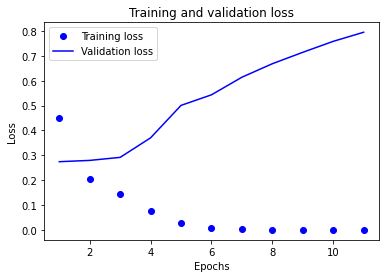

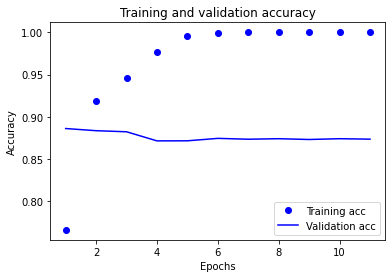

              precision    recall  f1-score   support

           0      0.872     0.905     0.888     12500
           1      0.901     0.867     0.884     12500

    accuracy                          0.886     25000
   macro avg      0.887     0.886     0.886     25000
weighted avg      0.887     0.886     0.886     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.5914 - accuracy: 0.6296 - val_loss: 0.3297 - val_accuracy: 0.8592
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2202 - accuracy: 0.9151 - val_loss: 0.2768 - val_accuracy: 0.8852
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1469 - accuracy: 0.9490 - val_loss: 0.3072 - val_accuracy: 0.8796
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0862 - accuracy: 0.9761 - val_loss: 0.3612 - val_accuracy: 0.8771
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

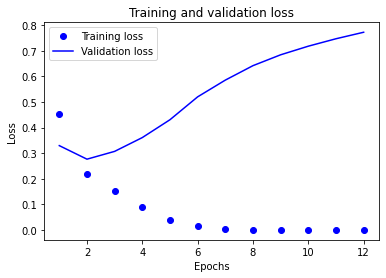

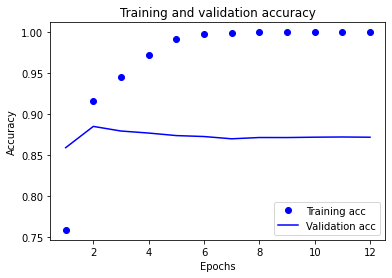

              precision    recall  f1-score   support

           0      0.899     0.868     0.883     12500
           1      0.872     0.903     0.887     12500

    accuracy                          0.885     25000
   macro avg      0.886     0.885     0.885     25000
weighted avg      0.886     0.885     0.885     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.5850 - accuracy: 0.6382 - val_loss: 0.2768 - val_accuracy: 0.8834
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2010 - accuracy: 0.9219 - val_loss: 0.2918 - val_accuracy: 0.8786
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1224 - accuracy: 0.9608 - val_loss: 0.3250 - val_accuracy: 0.8746
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0532 - accuracy: 0.9880 - val_loss: 0.4067 - val_accuracy: 0.8704
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

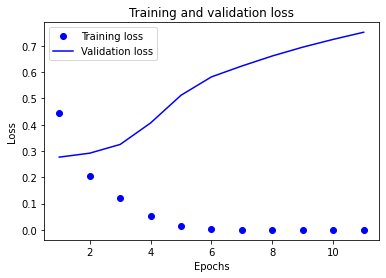

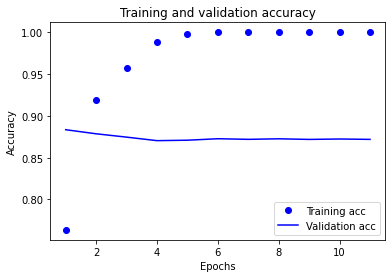

              precision    recall  f1-score   support

           0      0.877     0.892     0.884     12500
           1      0.890     0.875     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6380 - accuracy: 0.5780 - val_loss: 0.2992 - val_accuracy: 0.8732
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.2376 - accuracy: 0.9074 - val_loss: 0.2766 - val_accuracy: 0.8847
Epoch 3/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1674 - accuracy: 0.9395 - val_loss: 0.2944 - val_accuracy: 0.8822
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.1299 - accuracy: 0.9557 - val_loss: 0.3311 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.

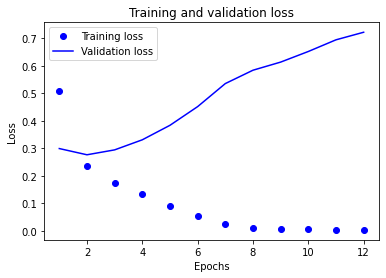

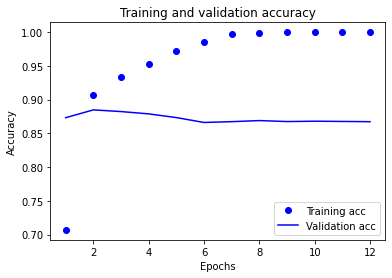

              precision    recall  f1-score   support

           0      0.880     0.891     0.885     12500
           1      0.889     0.879     0.884     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


Average accuracy: 0.89 (+/- 0.01)
Average loss: 0.27 (+/- 0.01)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(units=250, activation="relu"),
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  print("")
  n += 1

print("Average accuracy: {:.2f} (+/- {:.2f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.2f} (+/- {:.2f})".format(np.mean(cv_loss), np.std(cv_loss)))
